<a href="https://colab.research.google.com/github/rekarromar/Most-Popular-GitHub-Projects/blob/main/MostPopularGithubRepos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/rekarromar/Most-Popular-GitHub-Projects/main/MostPopularGitHubRepos.csv'
data = pd.read_csv(url)

In [5]:
most_starred = data.sort_values(by=['Stars'], ascending=False).head(10)
print(most_starred[['Name', 'Language', 'Stars']])

                        Name    Language   Stars
0  freeCodeCamp/freeCodeCamp  JavaScript  224136
1             twbs/bootstrap  JavaScript  105991
2                      d3/d3  JavaScript   59462
3             facebook/react  JavaScript   58176
4         angular/angular.js  JavaScript   54439
5    getify/You-Dont-Know-JS  JavaScript   49828
6     robbyrussell/oh-my-zsh       Shell   48136
7   FortAwesome/Font-Awesome        HTML   47865
8          airbnb/javascript  JavaScript   46155
9      tensorflow/tensorflow         C++   43721


In [6]:
languages = data.groupby(['Language']).size().reset_index(name='Count')

# sort the result by the number of repositories in descending order and display the top 10
most_common_languages = languages.sort_values(by=['Count'], ascending=False).head(10)
print(most_common_languages)

      Language  Count
12  JavaScript    123
18      Python     26
11        Java     19
10        HTML     18
19        Ruby     15
5          CSS     14
9           Go     11
4          C++     11
23       Swift     10
2            C     10


In [9]:
most_forked = data.loc[data.groupby(['Language'])['Forks'].idxmax()].sort_values(by=['Language', 'Forks'], ascending=False)
most_forked.head(10)

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern
281,altercation/solarized,10599,2851,VimL,precision color scheme for multiple applicatio...,https://github.com/altercation/solarized,Application software,Slow
38,driftyco/ionic,27631,6566,TypeScript,Build amazing native and progressive web apps ...,https://github.com/driftyco/ionic,Web libraries and frameworks,Moderate
65,Alamofire/Alamofire,21612,3724,Swift,Elegant HTTP Networking in Swift,https://github.com/Alamofire/Alamofire,Non-web libraries and frameworks,Moderate
6,robbyrussell/oh-my-zsh,48136,11625,Shell,"A delightful community-driven (with 1,000+ con...",https://github.com/robbyrussell/oh-my-zsh,Software tools,NaN
238,apache/spark,11485,10760,Scala,Mirror of Apache Spark,https://github.com/apache/spark,Software tools,Moderate
76,rust-lang/rust,20090,3808,Rust,"A safe, concurrent, practical language.",https://github.com/rust-lang/rust,System software,Moderate
20,rails/rails,34188,13896,Ruby,Ruby on Rails,https://github.com/rails/rails,Web libraries and frameworks,Slow
124,shadowsocks/shadowsocks,16017,9980,Python,NaN,https://github.com/shadowsocks/shadowsocks,Software tools,Moderate
32,laravel/laravel,28856,9543,PHP,A PHP Framework For Web Artisans,https://github.com/laravel/laravel,Web libraries and frameworks,Moderate
106,facebook/pop,17078,2724,Objective-C++,"An extensible iOS and OS X animation library, ...",https://github.com/facebook/pop,Non-web libraries and frameworks,Moderate


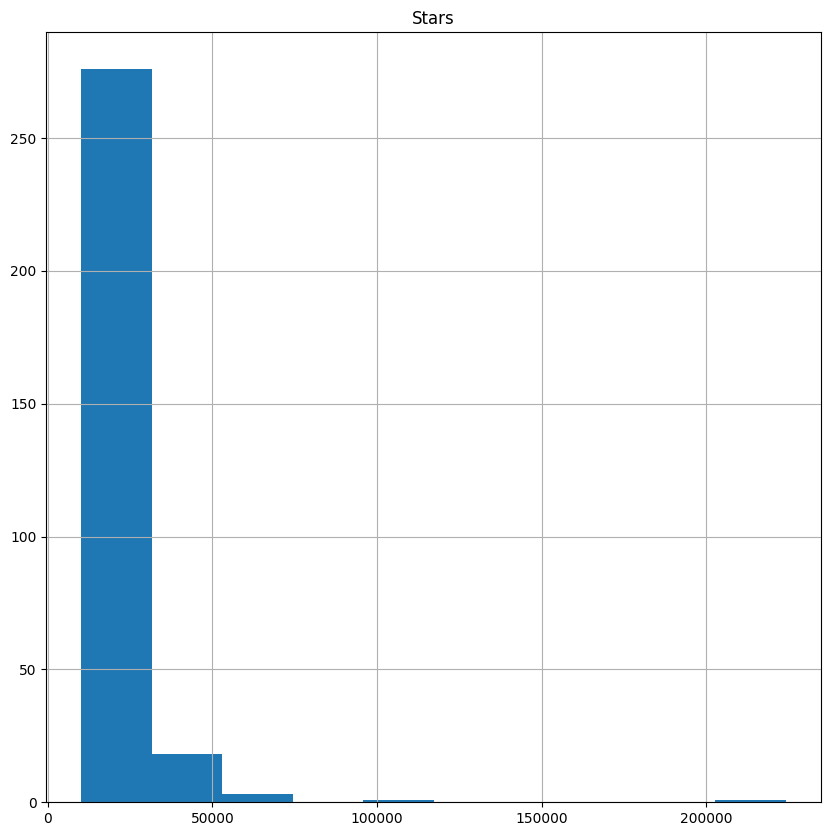

In [ ]:
mydata.hist(['Stars'],figsize=(10,10))
plt.show()


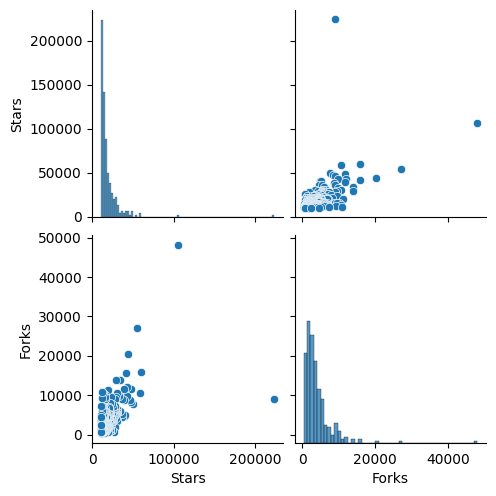

In [ ]:
sns.pairplot(mydata)

<ipython-input-19-557186410a36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['Stars'])


<Axes: xlabel='Stars', ylabel='Density'>

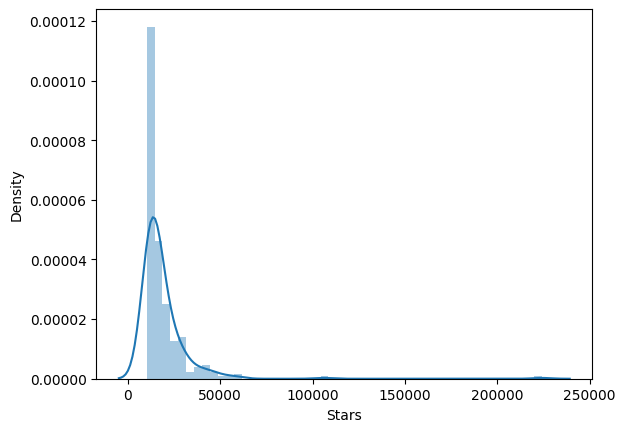

In [ ]:
sns.distplot(mydata['Stars'])

In [ ]:
corr = mydata.corr()
corr

,Stars,Forks
Stars,1.000000,0.557185
Forks,0.557185,1.000000


<Axes: >

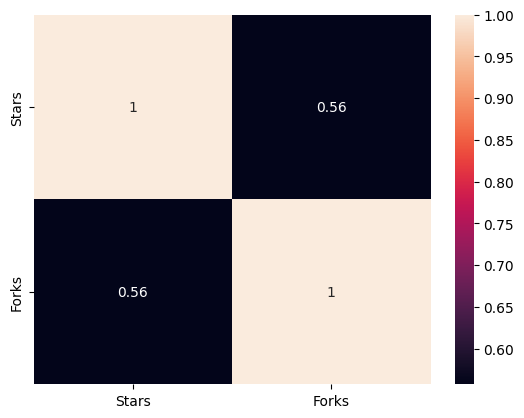

In [ ]:
sns.heatmap(corr, annot=True)